**计算物理学(A)作业4：线性方程组和矩阵本征值**

姓名：Your name!

学号：Your id number!

注意：请使用Python语言完成所有编程作业。允许并鼓励同学间合作，但严禁抄袭别人的代码，且严禁直接抄袭ChatGPT的代码；请直接在题干后附加代码块和必要的公式，讨论等；作图请包含x,y轴label，以及必要的图例。过多信息的缺失可能会导致丢分。

作业提交只需直接提交这个完成后的jupyter notebook，并命名为"姓名-学号-作业x"。

本次作业额外注意事项：**鼓励**大家使用`numpy.linalg`和`numpy.fft`库，省去所有不必自己造的轮子。另外**第一题的(e)(f)问是附加题**，供感兴趣的同学自行探索。

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (4, 3)

**1 数值求解电阻网格**

本问题受著名“波兰中学生”Krzysztof Giaro命制的某道题目启发。对于一些同学而言，希望这道题能带你回到曾经课桌前的那个盛夏；

在学习普物电磁学或者电子电路课程的时候，你一定接触过如何求直流电阻网络两点间等效电阻。对于简单的电路我们直接利用串并联合并即可，但对于连接关系更复杂的网络，虽然我们可以利用"$Y-\Delta$"变换等技术来简化电路，但我们仍需要更系统的求解方案。最直接的办法就是利用电流注入法：对于纯电阻网络的$A,B$间等效电阻$R_{AB}$，我们假设从$A$点注入电流$I$，在$B$点流出电流$I$。那么我们只需在网格中利用基尔霍夫定律求出$A$点相比于$B$点(可设为电势为0)的电势$U$，即可直接求出
$$
R_{AB}=\frac{U}{I}
$$

本题目的目标就是利用电流注入法，数值求解任意大的网络的任意两点间电阻。假设我们的网格是拥有$M\times N$个格点的长方形均匀电阻网络，其中格点落在满足$0 \leq i < M, 0\leq j < N$的整数坐标顶点$(i, j)$。所有顶点的最近邻边(距离为1)均连接阻值为1的电阻（没错，就是你想象中的最正常的电阻网络）。

**(a)** 请基于以上思想自行设计算法，编写函数`CalcSquareResistance(M, N, pos1, pos2)`，任取一点为电势零点，实现对于$M\times N$的上述网络，返回网格上每个格点的电压分布，以及两点`pos1=(y1, x1)`和`pos2=(y2, x2)`两点间的电阻。

**(b)** 下面我们（你）测试一下你的代码写的是否正确。请运行你的代码，给出以下三种情况的计算结果和理论值：
- “口”字型$M=2, N=2$网络，对角线上两点间$((0, 0); (1, 1))$；
- “田”字格$M=3, N=3$网络，对角线上最远两点间$((0, 0); (2, 2))$；
- “田”字格$M=3, N=3$网络，田字格顶点和中心点间$((0, 0); (1, 1))$。

**Hint**：这可能是本课程第一个需要自行从头编写算法debug的作业，如果你遇到了困难，建议从最小的体系出发(比如一维)，检查电流、电压分布是否正常；另外(b)问的三种情况的**理论值**不需要给出推导过程，直接写出三个有理数的结果即可；

**(c)** 波兰中学生考虑的原始的问题是：在**无穷大**的上述方格网络中，求$(0, 0)$和$(m, n)$之间的电阻$R_{mn}$；他最终获得了一个非常疯狂的解析式：
$$
R_{mn}=
\int_{-\pi}^\pi \frac{d k_x}{2 \pi} \int_{-\pi}^\pi \frac{d k_y}{2 \pi} \frac{1-\cos \left(m k_x+n k_y\right)}{2-\cos k_x-\cos k_y}
$$

当然我们这次作业不是微积分作业，所以我们不做这个积分，而是直接从电路底层性质出发进行数值求解。显然我们计算不了无穷大网格，只能取有限大的作截断。请取到你认为足够大的网格，计算$R_{11}$的值并和理论值$R_{11}=\frac{2}{\pi}$对比(精确到小数点后第三位即可)，然后画出网格所有格点的电压分布图，在图中标出电流注入、注出源。注意你应当对电流注入、注出点整体平移到网格中间的区域，以减小边界截断的影响。然后请对于你选好的足够大的网格尺寸，计算$R_{10},R_{20},R_{21},R_{22}$。

**(d)** 和这个二维平面电阻网格相关的另一个应用是Van der Pauw法测电导。https://en.wikipedia.org/wiki/Van_der_Pauw_method
对于有限大的二维平面，在**边界**上沿逆时针方向依次任取四个点1,2,3,4，假设从1注入电流$I_{12}$，从2流出电流$I_{12}$，测量3,4间电压$V_{34}$，则我们可以定义一个阻值(假设取了绝对值都是正的)
$$
R_{12,34}=\frac{V_{34}}{I_{12}}
$$
Van der Pauw曾经严格推导出对于任何形式的均匀电导率平面，对于任何四个点1,2,3,4均有如下关系(Eq.1)成立：
$$
\begin{equation}
e^{-\pi R_{12,34}/\sigma} + e^{-\pi R_{23, 41}/\sigma} = 1
\end{equation}
$$

用这个关系就可以通过对任意4点进行$V_{34}$和$V_{41}$的测量解方程得到样品表面的电导率$\sigma$。当然，如果我们将平面作方格离散处理，由量纲分析不难推出方格近邻格点间等效电阻数值近似等于电导率，即$R=\sigma=1$。请对于$M=2N$对于不同$N$的值，简单起见取长方形的四个顶点作为1,2,3,4四个测量点，探究Eq.1关系是否成立；如果Eq.1关系成立，请选择其他你喜欢的4个测量点位置继续探究Eq.1关系是否成立。

**注意：接下来的(e)(f)问都是附加题，做了加分，不做不扣分。**

**(e)** 当然，波兰中学生的无限网格中电阻问题还可以推广到其他形状的格子，比如六角格子和Honeycomb格子。请任选一个，用你喜欢的定义方式写一个类似于`CalcSquareResistance`函数，以网格尺寸和测量点为输入，输出网格电压分布和两点间等效电阻。然后仍然取足够大的网格，只需求解无限大网格中**最近邻**和**次近邻**两个格点之间的等效电阻。你能否利用对称性立刻获得/验证这些答案？

**(f)** 当然，Van der Pauw法不仅适用于简单的矩形平面，还适用于各种奇形怪状的平面。请以等腰直角三角形的样品为例，仍然用前面我们描述的正方形网格对表面进行划分，用类似于 **(d)** 问的方法继续探究Eq.1关系是否成立。

In [3]:
def CalcSquareResistance(M, N, pos1, pos2):
    # begin your code here

    return volts, resistance

**2 谐振子与Gross-Pitaevski方程**

在本问题里你将学会如何求解线性算符的本征值问题，以及利用平均场近似作自洽场迭代求解非线性算符的本征值问题。

我们从一维谐振子开始考虑，量子力学框架下其哈密顿量写作$ \hat{H} = -\frac{1}{2} \nabla^2 + \frac{1}{2}x^2  $，系统波函数$\Psi(x)$就满足薛定谔方程：
$$
\hat{H} \Psi(x) = \varepsilon \Psi(x)
$$

这就是最典型的线性算符本征值问题，它的求解办法五花八门，最常见的有：直接离散差分，和将波函数按基组展开。本次作业我们讨论后者。

**(a)** 按基组展开：我们可以把波函数按正交完备基展开，求解展开系数。常见的基组就是平面波，即对应傅里叶展开。对于任意形式的单体势能$V(x)$，我们需要将波函数和$V(x)$展开：
$$ \Psi(x) = \sum_k c_k e^{-i k x}, \quad V(x)=\sum_k V_k e^{-ikx}$$

代入薛定谔方程，请证明最后我们可以得到如下方程：
$$
\sum_{k'} (V_{k-k'}+\frac{1}{2}k^2 \delta_{k, k'})c_{k'}= \sum_{k'}h_{k,k'}c_{k'}=\varepsilon c_k
$$

这样我们就得到了傅里叶基组下的离散化哈密顿量$h$，进而化为矩阵本征值问题，可以求出本征值。本征向量需要通过对$c_k$进行傅里叶逆变换得到。

**(b)** 请按照上述思路自行编写算法，求出系统的前三个本征值，并画出前三个本征值对应的波函数(本征态)的图像，验证你的计算结果(本征值和本征态)和解析解一致。

**Hint**：从物理上考虑，采样点的$kx$应当取$[-\pi, \pi]$；另外请小心傅里叶变换的系数。

**(c)** 接下来我们考虑Gross-Pitaevski方程，它相比原先的理想谐振子多了一个非线性项：
$$
\hat H \phi(x) = 
\left[-\frac{1}{2} \nabla^2 +\frac{1}{2}x^2 -g|\phi(x)|^2\right] \phi(x)=\varepsilon \phi(x) \text {. }
$$

其中对于吸引势的情形，$g>0$。我们希望求解这个系统的基态，但对于这种非线性算符，我们无法再直接构建离散化的矩阵进行求解。对此，我们常见的应对策略是利用平均场近似进行自洽场(Self Consistent Field, SCF)迭代：
- 首先无视非线性项，解出理想谐振子基态波函数$\phi_0$；
- 用$\phi_0$代入非线性项，于是相当于求解单体问题，但是$\tilde V (x)=x^2/2 - g|\phi_0(x)|^2$，由此解出基态波函数$\phi_1$；
- 用$\phi_1$代入非线性项，于是相当于求解单体问题，但是$\tilde V (x)=x^2/2 - g|\phi_1(x)|^2$，由此解出基态波函数$\phi_2$；
- ...
- 反复迭代，直到波函数$\phi_n$相比于$\phi_{n-1}$(或本征值)变化小于阈值，则认为迭代收敛，返回$\phi_n(x)$及对应基态能量本征值$\varepsilon_n$。

请画出基态能量在$g\in [0, 9]$范围内的变化图，画出$g=0, 1, 4, 9$的基态波函数$\phi(x)$，并在定性上讨论你的结果。

**3 放松一下！画个蝴蝶**

在1976年，Hofstadter在分析二维晶格在均匀外磁场下的能带时，作图发现了一个很美丽的图案，因为长得像蝴蝶，因此后人传颂为Hofstadter butterfly。这一现象在整数量子霍尔现象和拓扑量子数等场合下有很重要的意义。感兴趣的同学可以自行查阅 https://en.wikipedia.org/wiki/Hofstadter%27s_butterfly；

本次作业最后一道题只有一问，那就是带着大家把这个Hofstadter蝴蝶画出来！Hofstadter考虑的模型最后可以用如下运动方程(Harper方程)描述：
$$
x_{j+1}=\left[2-\lambda+\frac{g_0+g_1 \cos (2 \pi j \alpha)}{\kappa}\right] x_j-x_{j-1} \text {. }
$$

其中$x_j$可看作矢量$\vec x$的某个分量，$\lambda$就是离散哈密顿量的本征值，$\alpha,g_0,g_1,\kappa$都是模型参数。下面我们取无量纲参量$c=2-\lambda+\frac{g_0}{\kappa}$和$\gamma=\frac{g_1}{\kappa}$，取参数$\gamma=2$，于是上式简化为

$$
x_{j+1}=(c+2\cos (2 \pi j \alpha))x_j-x_{j-1}
$$

我们假设$j$从$1$取到$n=720$，即一共720个离散点，并取周期性边界条件$x_k = x_{n+k}$，这时我们可以认为$c=2-\lambda+\frac{g_0}{\kappa}$是等效的本征值问题的“本征值”；请对于横轴上连续变化的$\alpha\in[0, 1]$，对每个$\alpha$在竖直方向上作出所有“本征值”$c$的纵向散点分布，最后将所有结果汇总画在$\alpha \text{-} c$平面上，你就会看到一只蝴蝶！

保持开心，你是最棒的！

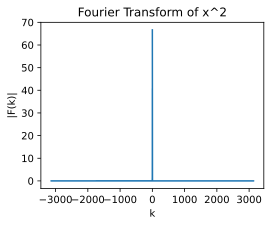

In [31]:
#!/usr/bin/python
import numpy as np

def x_squared_fourier(L):
    # 定义积分步长和积分范围
    dx = 0.001
    x_values = np.arange(-L, L, dx)
    
    # 计算函数 x^2 在区间 [-L, L] 上的傅里叶变换
    f_values = x_values**2
    F_values = np.fft.fft(f_values)
    
    # 计算频率
    k_values = 2 * np.pi * np.fft.fftfreq(len(x_values), dx)
    
    return k_values, F_values

# 定义区间范围
L = 10

# 计算傅里叶变换
k_values, F_values = x_squared_fourier(L)

# 绘制结果
plt.plot(k_values, np.abs(F_values/(L/0.001)))
plt.xlabel('k')
plt.ylabel('|F(k)|')
plt.title('Fourier Transform of x^2')
plt.show()


C:\Users\86189\AppData\Local\Temp\ipykernel_36484\1913444954.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  H[i][j] = 0.5*(i-kmax)**2+k[i-j+kmax]
C:\Users\86189\AppData\Local\Temp\ipykernel_36484\1913444954.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  H[i][j] = k[i-j+kmax]


[0.00370208+0.j 0.49997899+0.j 0.50758076+0.j]


ValueError: x and y must have same first dimension, but have shapes (61,) and (30,)

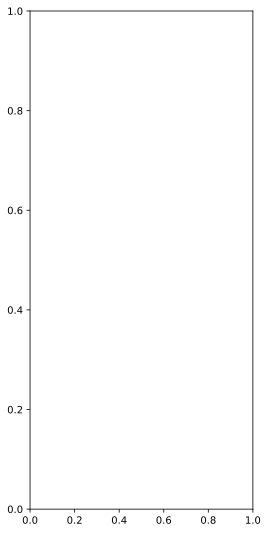

In [36]:
import math
plt.rcParams['figure.figsize'] = (4, 9)
kmax =30
N = 100
T = 1.0 / N
x = np.linspace(-math.pi,math.pi, N)
y = np.square(x)/2
y_fft = np.fft.fft(y)
k = y_fft*2 / N
k = np.fft.fftshift(k)
H = np.zeros((2*kmax+1,2*kmax+1))
for i in range(2*kmax+1):
    for j in range(2*kmax+1):
        if i == j:
            H[i][j] = 0.5*(i-kmax)**2+k[i-j+kmax]
        else:
            H[i][j] = k[i-j+kmax]
values, vec = np.linalg.eig(H)
idx_sorted = np.argsort(values)     
values,vec = values[idx_sorted], vec[:, idx_sorted]
print(values[:3])
for i in range(3):
    m = np.fft.ifft(np.transpose(vec[:,i]))
    plt.plot([i for i in range(len(m))],m[len(m)//2+1:]+m[:len(m)//2])
    plt.subplot(3, 1, i)
    plt.title(r'$E_{%s}=%.2f$'%(n, values[i]))
    plt.ylabel(r'$\rho_{%s}(x)=\psi_{%s}^*(x)\psi_{%s}(x)$'%(i, i, i))
    plt.xlabel(r'$x$')